In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar los datos
df = pd.read_csv("ipsaCompleto.csv")  # Asegúrate de que este CSV tiene las columnas "Date" y "Price"
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Fecha"] = df["Fecha"].map(pd.Timestamp.toordinal)  # Convertir fechas a números

In [3]:
# Separar en datos de entrada (X) y salida (y)
X = df["Fecha"].values.reshape(-1, 1)
y = df["Valor IPSA"].values

# Escalar los datos (opcional, pero recomendado)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

In [4]:
# Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [9]:
# Hacer una predicción para mañana
proxima_fecha = df["Fecha"].max() + 1
proxima_fecha_scaled = scaler_x.transform([[proxima_fecha]])
prediccion_scaled = modelo.predict(proxima_fecha_scaled)
prediccion = scaler_y.inverse_transform(prediccion_scaled.reshape(-1, 1))

print(f"Predicción del IPSA el día siguiente: {prediccion[0][0]:.2f}")



Predicción del IPSA el día siguiente: 6224.29


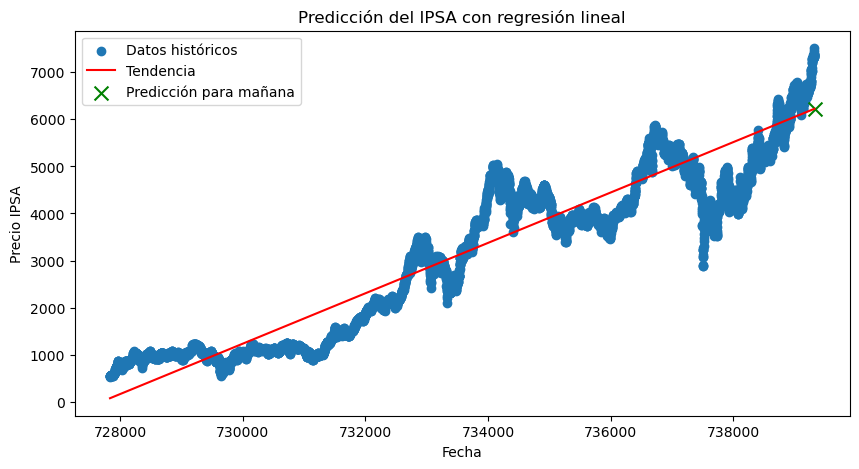

In [14]:
# Visualizar resultados
plt.figure(figsize=(10, 5))
plt.scatter(df["Fecha"], df["Valor IPSA"], label="Datos históricos")
plt.plot(df["Fecha"], modelo.predict(X_scaled) * scaler_y.scale_ + scaler_y.mean_, color="red", label="Tendencia")
plt.scatter(proxima_fecha, prediccion, color="green", label="Predicción para mañana", marker="x", s=100)
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Precio IPSA")
plt.title("Predicción del IPSA con regresión lineal")
plt.show()